# DeepTables

## DeepTables: Deep-learning Toolkit for Tabular data
DeepTables(DT) is a easy-to-use toolkit that enables deep learning to unleash great power on tabular data.


## Overview

MLP (also known as Fully-connected neural networks) have been shown inefficient in learning distribution representation. The "add" operations of the perceptron layer have been proven poor performance to exploring multiplicative feature interactions. In most cases, manual feature engineering is necessary and this work requires extensive domain knowledge and very cumbersome. How learning feature interactions efficiently in neural networks becomes the most important problem.

Various models have been proposed to CTR prediction and continue to outperform existing state-of-the-art approaches to the late years. Well-known examples include FM, DeepFM, Wide&Deep, DCN, PNN, etc. These models can also provide good performance on tabular data under reasonable utilization.

DT aims to utilize the latest research findings to provide users with an end-to-end toolkit on tabular data.

DT has been designed with these key goals in mind:

* Easy to use, non-experts can also use.
* Provide good performance out of the box.
* Flexible architecture and easy expansion by user.

## Example

In [1]:
from deeptables.models.deeptable import DeepTable, ModelConfig
from deeptables.datasets import dsutils
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

#### loading data

In [2]:
df = dsutils.load_bank()
df.drop(['id'], axis=1, inplace=True)

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

y = df_train.pop('y')
y_test = df_test.pop('y')

#### training

In [3]:
config = ModelConfig(fixed_embedding_dim=True,embeddings_output_dim=4,metrics=['AUC','acc'],auto_discrete=True)

dt = DeepTable(config=config)
model, history = dt.fit(df_train, y, epochs=10)

2 class detected, {'yes', 'no'}, so inferred as a [binary classification] task
Preparing features cost:0.07581210136413574
Imputation cost:0.3101482391357422
Categorical encoding cost:0.6227331161499023
Discretization cost:0.207719087600708
fit_transform cost:1.306624174118042
Injected a callback [EarlyStopping]. monitor:val_AUC, patience:1, mode:max
>>>>>>>>>>>>>>>>>>>>>> Model Desc <<<<<<<<<<<<<<<<<<<<<<< 
---------------------------------------------------------
inputs:
---------------------------------------------------------
['all_categorical_vars: (16)', 'input_continuous_all: (7)']
---------------------------------------------------------
embeddings:
---------------------------------------------------------
input_dims: [14, 5, 6, 4, 4, 4, 5, 14, 6, 5, 9, 4, 7, 4, 6, 4]
output_dims: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
dropout: 0.3
---------------------------------------------------------
dense: dropout: 0
batch_normalization: False
-----------------------------------

#### evaluation

In [4]:
dt.evaluate(df_test,y_test, batch_size=512, verbose=0)

transform_X cost:2.3395299911499023
transform_y cost:0.0034241676330566406


{'loss': 0.06808515293427966, 'AUC': 0.9969886, 'acc': 0.9831344}

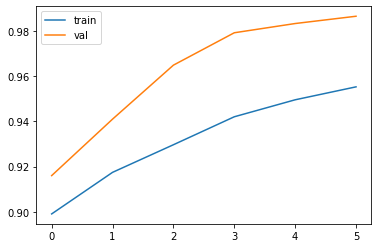

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train', 'val'], loc='upper left') 

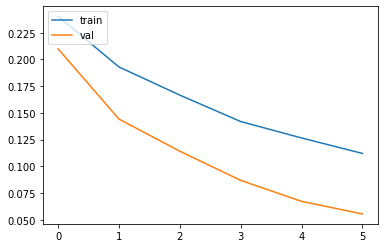

In [6]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'], loc='upper left') 

#### scoring

In [7]:
preds = dt.predict(df_test)

transform_X cost:2.2259840965270996
predict_proba cost:3.6123929023742676
